In [1]:
import pandas as pd
from matplotlib import pyplot as plt

from settings import INTERIM

In [2]:
scoring = pd.read_pickle(INTERIM / 'scoring_multi_index.pkl')
birth_dates = pd.read_pickle(INTERIM / 'birth_dates.pkl')

In [3]:
scoring.head()

firstName    lastName pos tmID    GP    G     A   Pts    SOG
playerID  year                                                             
aaltoan01 1997     Antti       Aalto   C  ANA   3.0  0.0   0.0   0.0    1.0
          1998     Antti       Aalto   C  ANA  73.0  3.0   5.0   8.0   61.0
          1999     Antti       Aalto   C  ANA  63.0  7.0  11.0  18.0  102.0
          2000     Antti       Aalto   C  ANA  12.0  1.0   1.0   2.0   18.0
abdelju01 2007    Justin  Abdelkader   L  DET   2.0  0.0   0.0   0.0    6.0

In [5]:
wayne = scoring.loc['gretzwa01']

In [6]:
wayne.groupby('year')[['G', 'A']].sum()

,G,A
year,,
1980,55.0,109.0
1981,92.0,120.0
1982,71.0,125.0
1983,87.0,118.0
1984,73.0,135.0
1985,52.0,163.0
1986,62.0,121.0
1987,40.0,109.0
1988,54.0,114.0


In [7]:
sums = wayne.groupby(level=0)[['G', 'A']].sum()
sums

,G,A
year,,
1980,55.0,109.0
1981,92.0,120.0
1982,71.0,125.0
1983,87.0,118.0
1984,73.0,135.0
1985,52.0,163.0
1986,62.0,121.0
1987,40.0,109.0
1988,54.0,114.0


In [12]:
sums.index = pd.to_datetime(sums.index, format='%Y')

In [13]:
sums.head()

,G,A
year,,
1980-01-01,55.0,109.0
1981-01-01,92.0,120.0
1982-01-01,71.0,125.0
1983-01-01,87.0,118.0
1984-01-01,73.0,135.0


In [15]:
sums.index

DatetimeIndex(['1980-01-01', '1981-01-01', '1982-01-01', '1983-01-01',
               '1984-01-01', '1985-01-01', '1986-01-01', '1987-01-01',
               '1988-01-01', '1989-01-01', '1990-01-01', '1991-01-01',
               '1992-01-01', '1993-01-01', '1994-01-01', '1995-01-01',
               '1996-01-01', '1997-01-01', '1998-01-01'],
              dtype='datetime64[ns]', name='year', freq=None)

In [18]:
means = sums.resample('3YE').sum().rolling(window=1)['G'].sum()
means

year
1980-12-31     55.0
1983-12-31    250.0
1986-12-31    187.0
1989-12-31    134.0
1992-12-31     88.0
1995-12-31     72.0
1998-12-31     57.0
Freq: 3YE-DEC, Name: G, dtype: float64

In [19]:
means = sums.rolling(window=3)['G'].sum()
means

year
1980-01-01      NaN
1981-01-01      NaN
1982-01-01    218.0
1983-01-01    250.0
1984-01-01    231.0
1985-01-01    212.0
1986-01-01    187.0
1987-01-01    154.0
1988-01-01    156.0
1989-01-01    134.0
1990-01-01    135.0
1991-01-01    112.0
1992-01-01     88.0
1993-01-01     85.0
1994-01-01     65.0
1995-01-01     72.0
1996-01-01     59.0
1997-01-01     71.0
1998-01-01     57.0
Name: G, dtype: float64

In [21]:
sums.rolling(3).mean()

,G,A
year,,
1980-01-01,NaN,NaN
1981-01-01,NaN,NaN
1982-01-01,72.666667,118.000000
1983-01-01,83.333333,121.000000
1984-01-01,77.000000,126.000000
1985-01-01,70.666667,138.666667
1986-01-01,62.333333,139.666667
1987-01-01,51.333333,131.000000
1988-01-01,52.000000,114.666667


In [23]:
sums.rolling(3, min_periods=1).mean()

,G,A
year,,
1980-01-01,55.000000,109.000000
1981-01-01,73.500000,114.500000
1982-01-01,72.666667,118.000000
1983-01-01,83.333333,121.000000
1984-01-01,77.000000,126.000000
1985-01-01,70.666667,138.666667
1986-01-01,62.333333,139.666667
1987-01-01,51.333333,131.000000
1988-01-01,52.000000,114.666667


In [24]:
sums.rolling(3, center=True).mean()

,G,A
year,,
1980-01-01,NaN,NaN
1981-01-01,72.666667,118.000000
1982-01-01,83.333333,121.000000
1983-01-01,77.000000,126.000000
1984-01-01,70.666667,138.666667
1985-01-01,62.333333,139.666667
1986-01-01,51.333333,131.000000
1987-01-01,52.000000,114.666667
1988-01-01,44.666667,108.333333


In [25]:
sums.rolling(3, min_periods=1,center=True).mean()

,G,A
year,,
1980-01-01,73.500000,114.500000
1981-01-01,72.666667,118.000000
1982-01-01,83.333333,121.000000
1983-01-01,77.000000,126.000000
1984-01-01,70.666667,138.666667
1985-01-01,62.333333,139.666667
1986-01-01,51.333333,131.000000
1987-01-01,52.000000,114.666667
1988-01-01,44.666667,108.333333


In [26]:
sums['G'].rolling(3,center=True, win_type='triang' ).sum()

year
1980-01-01      NaN
1981-01-01    155.0
1982-01-01    160.5
1983-01-01    159.0
1984-01-01    142.5
1985-01-01    119.5
1986-01-01    108.0
1987-01-01     98.0
1988-01-01     94.0
1989-01-01     87.5
1990-01-01     76.5
1991-01-01     59.5
1992-01-01     50.5
1993-01-01     51.5
1994-01-01     41.5
1995-01-01     41.0
1996-01-01     48.0
1997-01-01     40.0
1998-01-01      NaN
Name: G, dtype: float64

In [27]:
sums.cumsum()

,G,A
year,,
1980-01-01,55.0,109.0
1981-01-01,147.0,229.0
1982-01-01,218.0,354.0
1983-01-01,305.0,472.0
1984-01-01,378.0,607.0
1985-01-01,430.0,770.0
1986-01-01,492.0,891.0
1987-01-01,532.0,1000.0
1988-01-01,586.0,1114.0


In [28]:
sums.cummax()

,G,A
year,,
1980-01-01,55.0,109.0
1981-01-01,92.0,120.0
1982-01-01,92.0,125.0
1983-01-01,92.0,125.0
1984-01-01,92.0,135.0
1985-01-01,92.0,163.0
1986-01-01,92.0,163.0
1987-01-01,92.0,163.0
1988-01-01,92.0,163.0


<Axes: xlabel='year'>

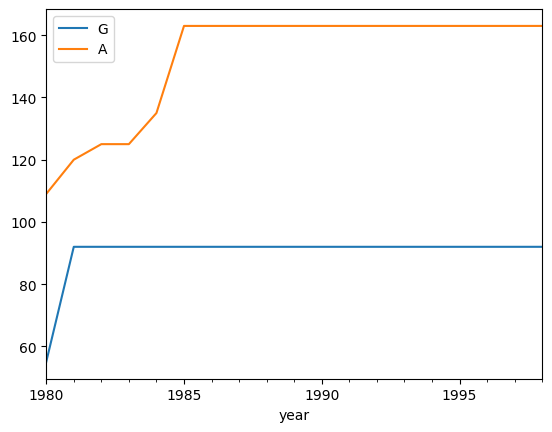

In [30]:
sums.cummax().plot()


In [31]:
import matplotlib.pyplot as plt
import numpy as np

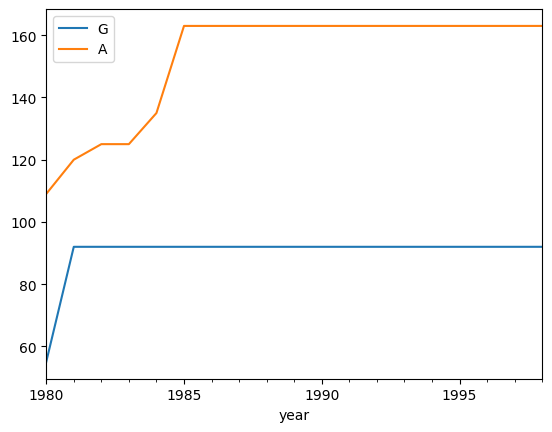

In [32]:
sums.cummax().plot()
plt.show()

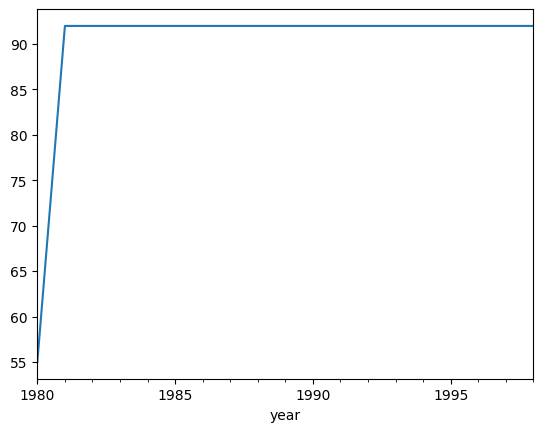

In [34]:
sums['G'].expanding().max().plot()
plt.show()

In [35]:
totals = sums.sum()
totals

G     843.0
A    1877.0
dtype: float64

In [36]:
sums['G'].expanding().agg(['sum', 'mean'])

,sum,mean
year,,
1980-01-01,55.0,55.000000
1981-01-01,147.0,73.500000
1982-01-01,218.0,72.666667
1983-01-01,305.0,76.250000
1984-01-01,378.0,75.600000
1985-01-01,430.0,71.666667
1986-01-01,492.0,70.285714
1987-01-01,532.0,66.500000
1988-01-01,586.0,65.111111


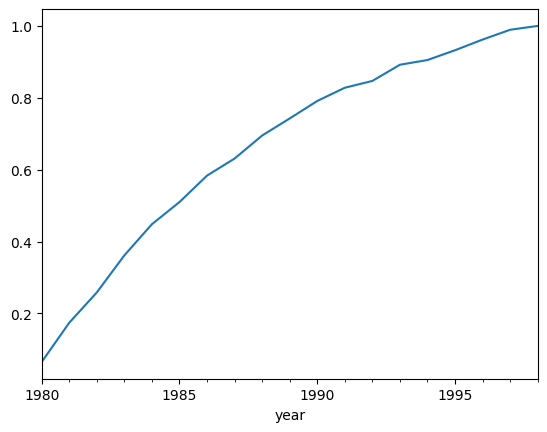

In [38]:
sums['G'].expanding().aggregate(lambda x: x.sum() / totals['G']).plot()
plt.show()


In [41]:
pd.Series([10,20,60, 100]).expanding().max()

0     10.0
1     20.0
2     60.0
3    100.0
dtype: float64

In [42]:
pd.Series([10,20,60, 100]).cumsum().max()

np.int64(190)